ARI&CA

C:\Users\YUXIN\AppData\Local\Temp\ipykernel_18616\245876150.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Method', y='ARI', data=df_ari, palette=palette, ax=axes[0])
C:\Users\YUXIN\AppData\Local\Temp\ipykernel_18616\245876150.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Method', y='CA', data=df_acc, palette=palette, ax=axes[1])


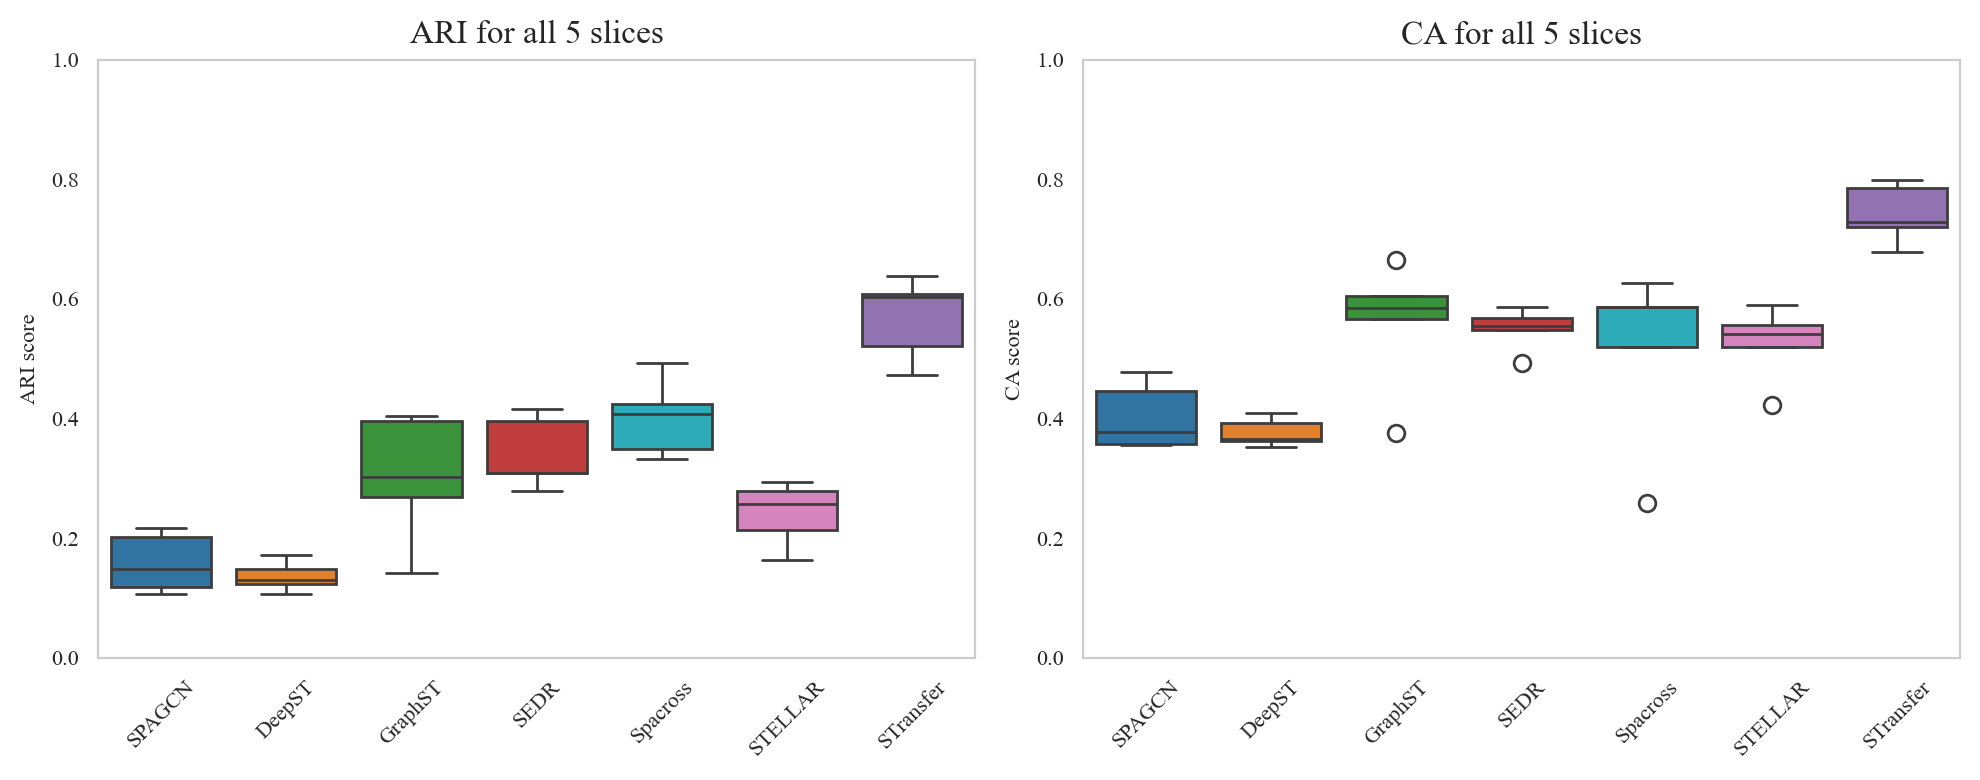

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Times New Roman'

palette = {
    'SPAGCN': '#1f77b4',
    'DeepST': '#ff7f0e',
    'GraphST': '#2ca02c',
    'SEDR': '#d62728',
    "Spacross": '#17becf',
    "STELLAR": '#e377c2',
    'STransfer': '#9467bd'
}

methods = ['SPAGCN', 'DeepST', 'GraphST', 'SEDR', "Spacross", "STELLAR", 'STransfer']

def load_melt(file_path, value_name):
    col_names = ['SampleID'] + methods
    df = pd.read_csv(file_path, sep=',', names=col_names, header=0)

    df['SampleID'] = df['SampleID'].astype(str)
    df = df[df['SampleID'].str.strip().str.lower() != 'avg']  # 去掉 avg 行

    for m in methods:
        df[m] = df[m].astype(float)

    df_melt = df.melt(id_vars='SampleID', value_vars=methods,
                      var_name='Method', value_name=value_name)
    df_melt['Method'] = df_melt['Method'].str.strip()
    return df_melt

# 路径
ari_path = r"C:\Users\YUXIN\Desktop\STransfer\test\HPR\box ari.csv"
acc_path = r"C:\Users\YUXIN\Desktop\STransfer\test\HPR\box acc.csv"

df_ari = load_melt(ari_path, "ARI")
df_acc = load_melt(acc_path, "CA")   # 你标题写 CA，这里也用 CA

# 画到同一张图（两个子图）
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=200)

sns.boxplot(x='Method', y='ARI', data=df_ari, palette=palette, ax=axes[0])
axes[0].set_ylim(0, 1)
axes[0].set_title("ARI for all 5 slices", fontsize=12)
axes[0].set_xlabel(None)
axes[0].set_ylabel('ARI score', fontsize=8)
axes[0].tick_params(axis='x', labelsize=8, rotation=45)
axes[0].tick_params(axis='y', labelsize=8)
axes[0].grid(False)

sns.boxplot(x='Method', y='CA', data=df_acc, palette=palette, ax=axes[1])
axes[1].set_ylim(0, 1)
axes[1].set_title("CA for all 5 slices", fontsize=12)
axes[1].set_xlabel(None)
axes[1].set_ylabel('CA score', fontsize=8)
axes[1].tick_params(axis='x', labelsize=8, rotation=45)
axes[1].tick_params(axis='y', labelsize=8)
axes[1].grid(False)

plt.tight_layout()
plt.show()


In [ ]:
matplotlib.rcParams['font.family'] = 'Times New Roman'
migration_labels = ['25-29', '26-29', '27-29', '28-29']
ari_29 = [0.52703486,0.538251437,0.557211693,0.709107203]
acc_29 = [0.706476637,0.720368032,0.672559986,0.832581634]

df = pd.DataFrame({
    'Migration': migration_labels,
    'ARI': ari_29,
    'ACC': acc_29
})

plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='Migration', y='ARI', label='ARI', marker='o', linewidth=2)
sns.lineplot(data=df, x='Migration', y='ACC', label='CA', marker='s', linewidth=2)
for i, label in enumerate(migration_labels):
    plt.text(label, ari_29[i] + 0.02, f"{ari_29[i]:.2f}", 
             ha='center', va='bottom', fontsize=9)
    plt.text(label, acc_29[i] + 0.02, f"{acc_29[i]:.2f}", 
             ha='center', va='bottom', fontsize=9)

plt.ylim(0, 1)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Migration (Source→29)', fontsize=12)
plt.title('ARI and ACC across Migration Paths', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.grid(False)
plt.xlabel(None)
plt.tight_layout()
plt.show()